# Introduction



The World Happiness Report is a landmark survey of the state of global happiness.

The data trying to analyze which country has higher happiness or life satisfaction and which of them have to be like Dystopia with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom, and least social support.

Other attributes are provided for the dataset to give us other insights and we will see the effect of each of these attributes.

In [1]:
# Main functions file
from configs import *

# Main libraries usage
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sklearn libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import  OneHotEncoder, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.tree import  DecisionTreeRegressor
from sklearn.metrics import  mean_squared_error
from sklearn.compose import  ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import  Pipeline

%matplotlib inline

## Display first 5 rows

The first step is to represent some rows from the data just to know what attributes look like then move on to discover more about them.

In [2]:
world_happiness_report = load_csv_file("2015.csv")
world_happiness_report.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

## Some information about the data and attributes

We can see that all of the attributes have no **NAN** values, even of that, we need to get a specific value for each attribute, because when the system go-live, maybe some of the value of the attribute will not be provided, in the case like this you have to apply the saved value for this attribute.

We also can notice that most of the attributes are numbers except the country and region.

Two attributes that are close to each other are the **Happiness Rank** and **Happiness score**, so we will use the score as your target variable since we trying to learn about regression.

Also, the memory usage is small enough to fit our memory.

In [3]:
world_happiness_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


## Some statistics about numbers attributes

Since most of the columns (attributes or features) are numbers it will be helpful to display some of statics related to these attributes, like what the mean, median, what the geatest values and lowest or what most values less than 25% or 50% another name is (first quarter range and third quarter range).

Insights you can get from this,
- maybe you need to apply feature scaling because different ranges for each attribute.
- maybe some numbers attribute like categorical because of small discrete values.


We can see that most attributes values are not far away from mean in the standard deviation but maybe because these attributes are just small numbers like 25% of **Happieness Rank** less than 40.

In [4]:
world_happiness_report.describe()

Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                    0.910245    1.029510                  0.696705   
75%                    1.158448    1.214405                  0.811013   
max                    1.690420    1.402230                  1.025250   

          Freedom  Trust (Government Corruption)  Generosity  \
count  158.000000                     158.000000  158.000000   
mean     0.428615                       0.143422    0.237296   
std      0.150693                       0.120034    0.126685   
min      0.000000                       0.000000    0.000000   
25%      0.328330                       0.061675    0.150553   
50%      0.435515                       0.107220    0.216130   
75%      0.549092                       0.180255    0.309883   
max      0.669730                       0.551910    0.795880   

       Dystopia Residual  
count         158.000000  
mean            2.098977  
std             0.553550  
min             0.328580  
25%             1.759410  
50%             2.095415  
75%             2.462415  
max             3.602140

In [5]:
world_happiness_report.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

## Discover some attributes unique values

Because some attributes are categorical and the other ones may be categorical also even displaying as numbers like **Happiness Rank**, so we need to know the unique values and for each of these unique what is the frequent numbers, and actually this can help us in the stage of splitting data.  

Also, some attributes may be better to remove from the dataset because it can cause misleading learning, like **Country**, it just displaying names and no information it holds.

Also like **Region** may hold some information about the life satisfaction from those who live in Africa from those in Europe so we can trying attribute combination, like remove it and add it to check its effect on learning.

Also like **Happiness Rank**, is going from very different values so, it will be good to consider as a number attribute.

In [6]:
world_happiness_report['Country'].value_counts()[:10]

Kosovo                 1
Congo (Brazzaville)    1
Jordan                 1
Montenegro             1
Canada                 1
Albania                1
Venezuela              1
Japan                  1
Angola                 1
Kuwait                 1
Name: Country, dtype: int64

In [7]:
world_happiness_report['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [8]:
world_happiness_report['Happiness Rank'].value_counts()

82     2
158    1
50     1
57     1
56     1
55     1
54     1
53     1
52     1
51     1
49     1
59     1
48     1
47     1
46     1
45     1
44     1
43     1
42     1
58     1
60     1
40     1
61     1
76     1
75     1
74     1
73     1
72     1
71     1
70     1
      ..
92     1
90     1
118    1
89     1
88     1
87     1
86     1
85     1
84     1
81     1
99     1
100    1
101    1
102    1
117    1
116    1
115    1
114    1
113    1
112    1
111    1
110    1
109    1
108    1
107    1
106    1
105    1
104    1
103    1
1      1
Name: Happiness Rank, Length: 157, dtype: int64

# Important Note !

The **Region** can help us during the stage of splitting data to train and test to consider all categories are provided inside the train and test with close ratio.

## Histogram

A simple graph that you can use is the histogram to display different ranges of data with their frequency, it will help you to understand more about the data you dealing with.

We can apply it to the whole data or just for some attributes we interest in.

The histogram helps us to discover like normal distribution of each attribute, or those who are skewed to right or left, which can help us know which attributes have outliers, which may cause misleading in learning and also may these outliers need to discover of this attribute have its effect on the target.

All of these steps help us to get insights and intuition about the data we dealing with.

As we can see from graphs below:

- Economy (GDP per Capita) range from .0 to 1.5.

You can ask the business owner about these values because there is no income for some people like 1.5 and so on, so find which numbers you multiply by is helpful to know the actual values like should we multiply by 10,000 to back the original values.

Even of machine learning model work best with small ranges of numbers, but we need to get a whole overview about the data and its attributes.

- Happiness Score, it from 2 to 7.

Also, we can ask about these values and what about the prediction when the system goes live maybe we go beyond these values or should we consider 7 is the maximum, like these question help us to understand in depth about the data we dealing with.

/home/abdelrahman/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/pan

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae2f33fbe0>,
      dtype=object)

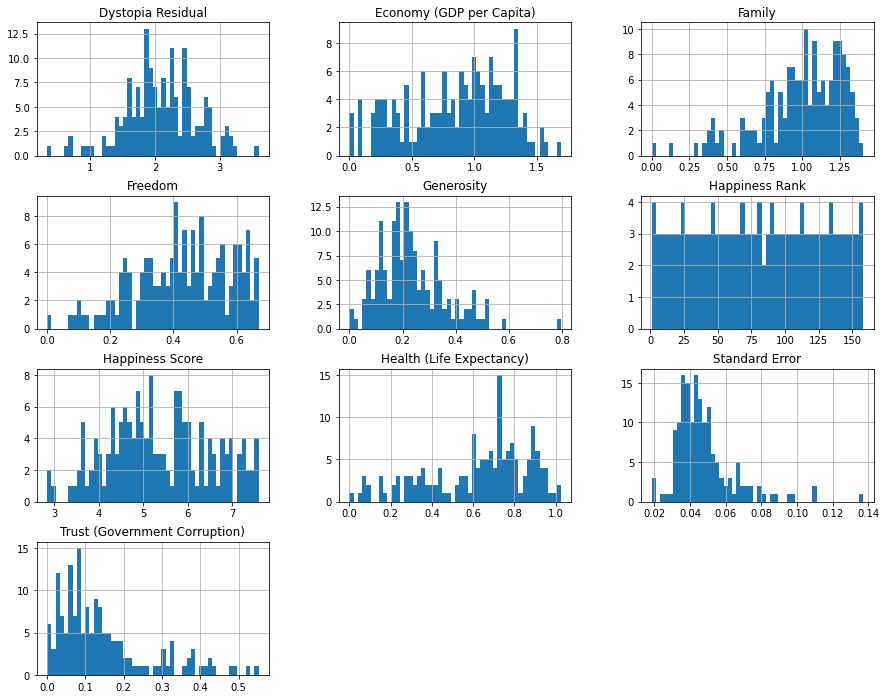

In [9]:
world_happiness_report.hist(bins=50, figsize=(15, 12))

## Create a Test set

After what we have discussed and present we need to go deeper in our discovery process and visualization, but first, we need to set aside part of the data for testing and use the rest of the data to discover and go deeper with the analysis.

We will split the data using two method, then comapre this pliting to the whole data, and check how the we consider all samples in the testing as well as in training.

The Region attribute can help us in splitting data, to consider each group are provided.

In [10]:
world_happiness_report['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [11]:
# test_size the size of testing set
# random_state to generate the same splitting each time run the code
random_train_set, random_test_set = train_test_split(world_happiness_report, test_size=.2, random_state=42)

In [12]:
# display number of instances per set
print(len(random_train_set), len(random_test_set))

126 32


In [13]:
# Instead of random splitting like train_test_split
# this splitting try to include all of categorize when split based on the attribute you need

# this stratified_splitting function from configs file 
tr_stratified_set, tes_stratified_set = stratified_splitting(world_happiness_report, "Region")
# As we can see same number of instance per set
print(len(tr_stratified_set), len(tes_stratified_set))

126 32


In [14]:

# this compare_random_stratified_split function from configs file
error_result = compare_random_stratified_split(world_happiness_report, random_test_set, 
                                              tes_stratified_set, "Region")
error_result.fillna(0, inplace=True)
error_result

overall  random_split  stratified_split  \
Australia and New Zealand        0.012658       0.03125           0.00000   
Central and Eastern Europe       0.183544       0.12500           0.18750   
Eastern Asia                     0.037975       0.03125           0.03125   
Latin America and Caribbean      0.139241       0.15625           0.15625   
Middle East and Northern Africa  0.126582       0.15625           0.12500   
North America                    0.012658       0.00000           0.00000   
Southeastern Asia                0.056962       0.06250           0.06250   
Southern Asia                    0.044304       0.00000           0.06250   
Sub-Saharan Africa               0.253165       0.34375           0.25000   
Western Europe                   0.132911       0.09375           0.12500   

                                 overall_Vs_random_error  \
Australia and New Zealand                       0.018592   
Central and Eastern Europe                      0.058544   
Eastern Asia                                    0.006725   
Latin America and Caribbean                     0.017009   
Middle East and Northern Africa                 0.029668   
North America                                   0.000000   
Southeastern Asia                               0.005538   
Southern Asia                                   0.000000   
Sub-Saharan Africa                              0.090585   
Western Europe                                  0.039161   

                                 overall_Vs_stratified_error  
Australia and New Zealand                           0.000000  
Central and Eastern Europe                          0.003956  
Eastern Asia                                        0.006725  
Latin America and Caribbean                         0.017009  
Middle East and Northern Africa                     0.001582  
North America                                       0.000000  
Southeastern Asia                                   0.005538  
Southern Asia                                       0.018196  
Sub-Saharan Africa                                  0.003165  
Western Europe                                      0.007911

In [15]:
error_result.fillna(0)

overall  random_split  stratified_split  \
Australia and New Zealand        0.012658       0.03125           0.00000   
Central and Eastern Europe       0.183544       0.12500           0.18750   
Eastern Asia                     0.037975       0.03125           0.03125   
Latin America and Caribbean      0.139241       0.15625           0.15625   
Middle East and Northern Africa  0.126582       0.15625           0.12500   
North America                    0.012658       0.00000           0.00000   
Southeastern Asia                0.056962       0.06250           0.06250   
Southern Asia                    0.044304       0.00000           0.06250   
Sub-Saharan Africa               0.253165       0.34375           0.25000   
Western Europe                   0.132911       0.09375           0.12500   

                                 overall_Vs_random_error  \
Australia and New Zealand                       0.018592   
Central and Eastern Europe                      0.058544   
Eastern Asia                                    0.006725   
Latin America and Caribbean                     0.017009   
Middle East and Northern Africa                 0.029668   
North America                                   0.000000   
Southeastern Asia                               0.005538   
Southern Asia                                   0.000000   
Sub-Saharan Africa                              0.090585   
Western Europe                                  0.039161   

                                 overall_Vs_stratified_error  
Australia and New Zealand                           0.000000  
Central and Eastern Europe                          0.003956  
Eastern Asia                                        0.006725  
Latin America and Caribbean                         0.017009  
Middle East and Northern Africa                     0.001582  
North America                                       0.000000  
Southeastern Asia                                   0.005538  
Southern Asia                                       0.018196  
Sub-Saharan Africa                                  0.003165  
Western Europe                                      0.007911

# Important Note !

Even of the big difference error between random and stratified Vs overall based on the **Region** attributes, it help you to consider that we should collect more instances for North America and Australia and New Zealand, as they just 2  instances.

## Discover and visualize to get insights

The histogram is helpful, but as we need to get more insights we need to go deeper, and the visualization helps us to get more insights since the brain is very weel capture information from images and graphs, also instead of representing each attribute on its own, now the time to discover the relation ship between attributes, or some attributes with the target attribute.

Now we have a train and test set so let us keep the test set aside and not touched till we decide to launch the model, also take a copy of the traing set to go in depth of discovering and keep the original data.

In [16]:
happiness_report = tr_stratified_set.copy()
happiness_report.head()

Country                           Region  Happiness Rank  \
127      Botswana               Sub-Saharan Africa             128   
150   Ivory Coast               Sub-Saharan Africa             151   
34   Saudi Arabia  Middle East and Northern Africa              35   
155         Syria  Middle East and Northern Africa             156   
115       Liberia               Sub-Saharan Africa             116   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
127            4.332         0.04934                   0.99355  1.10464   
150            3.655         0.05141                   0.46534  0.77115   
34             6.411         0.04633                   1.39541  1.08393   
155            3.006         0.05015                   0.66320  0.47489   
115            4.571         0.11068                   0.07120  0.78968   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
127                   0.04776  0.49495                        0.12474   
150                   0.15185  0.46866                        0.17922   
34                    0.72025  0.31048                        0.32524   
155                   0.72193  0.15684                        0.18906   
115                   0.34201  0.28531                        0.06232   

     Generosity  Dystopia Residual  
127     0.10461            1.46181  
150     0.20165            1.41723  
34      0.13706            2.43872  
155     0.47179            0.32858  
115     0.24362            2.77729

## Some Assumption

It more powerful when you trying to get insights from the data is to make some assumption which can lead you to good result at the end.

As we can in first graph how the **Happiness Score** going on to increase with the strong positive correlation between **Economy (GDP per Capita)** and ** Health (Life Expectancy)**.

Also, may be the **Freedom** has its relation with the **Dystopia Residual)**, as when the Dystopia Residual decrease it means that the life free is going to be high because all of us trying to life in Utopia, and the **Dystopia Residual** is represent the Dystopia Happiness, so it increase with the freedom.


Also, as there are two similr attribute which are **Happiness Rank** and **Happiness Score**, dicover these two attributes may be also help us to get more insights, and as we can see in the graph below there is a strong negative correlation.


<Figure size 720x720 with 0 Axes>

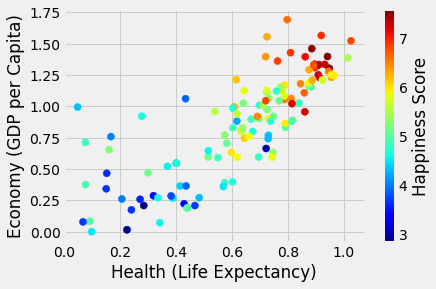

In [17]:
_ = visualize_plot(happiness_report, "scatter", "Health (Life Expectancy)", "Economy (GDP per Capita)",
                  50, "Happiness Score", True)

## Correlation

As we get a lot of insights from which attributes have its own linearity of effect the target variables, from strong positive correlation to strong negative correlation. But more insights is to get numbers that represent the correlation between each of these attributes with the target.

And as we can see that GDP per Capita as well as Life Expectancy are most effect the Happiness Score, and how far away Happiness Rank is strong negative as it, and others like **Standard Error** may be need to removed as it have a small negative affect on target so we can trying to train the model with and without.

In [18]:
correlation_metrix = happiness_report.corr()
correlation_metrix['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.774147
Family                           0.732949
Health (Life Expectancy)         0.720472
Freedom                          0.587719
Dystopia Residual                0.502247
Trust (Government Corruption)    0.380981
Generosity                       0.200766
Standard Error                  -0.188232
Happiness Rank                  -0.991884
Name: Happiness Score, dtype: float64

## Scatter Matrix

Even of graphs above give us a lot of insight we need more insights, but it not helpfull to graphs each of these attributes agnist each other it consume a lot of time and also we need one graph represent all in 1, but to represent each attribute against each other it means that, we have 10 number attributes it will produce 10*10 graph, so instead we display the most effected ones like what we see in the above numbers.

In [19]:
happiness_report.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [20]:
attributes = ["Happiness Score", "Happiness Rank", "Health (Life Expectancy)", "Economy (GDP per Capita)"]

/home/abdelrahman/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/pan

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae2b342908>,
      dtype=object)

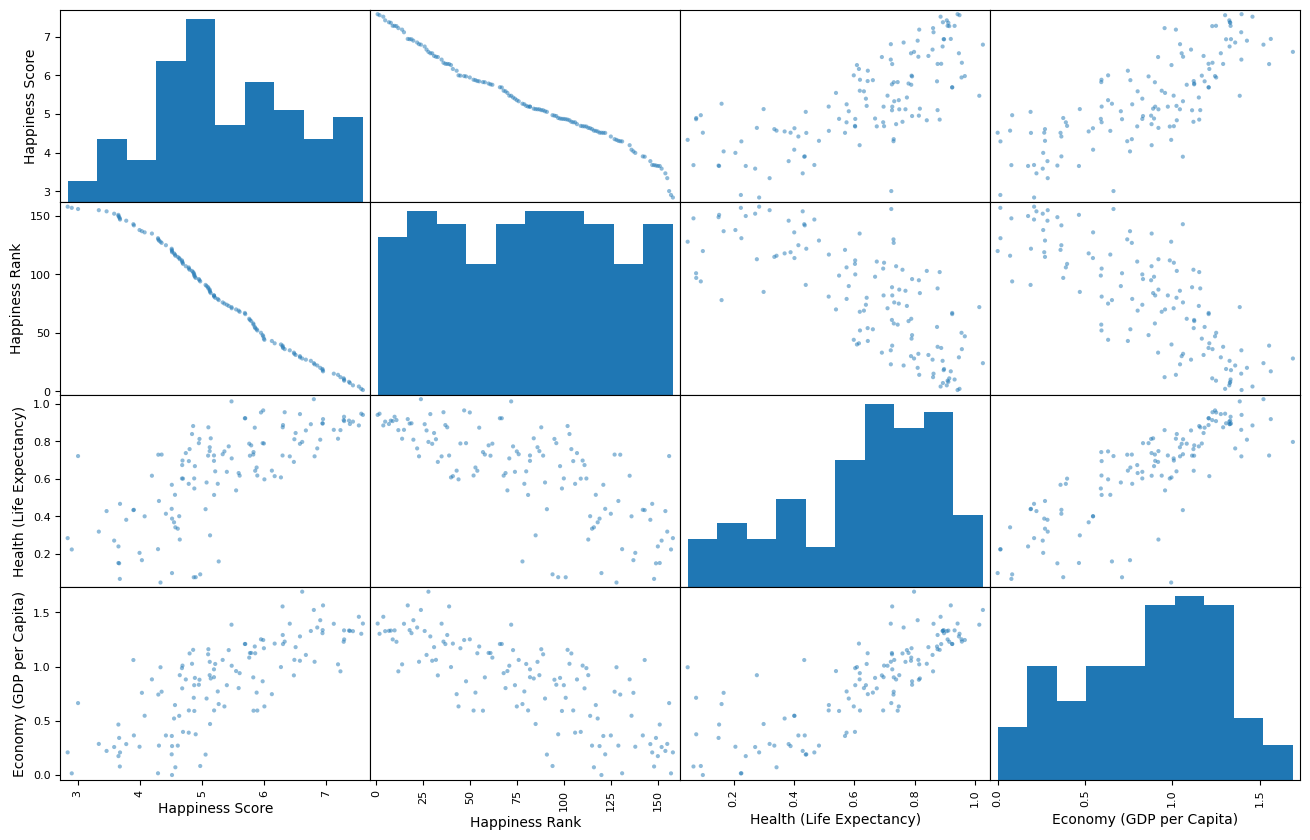

In [21]:
plt.style.use('default')
pd.plotting.scatter_matrix(happiness_report[attributes], figsize=(16,10))

## Note!!

**As we can see the strong relationship between the target and the other two ones, while these two and the target has a strong negative correlation with the *Happiness Score*.**

## Attribute Combination

It worse trying to add a relationship between two attributes to extract new ones, but even if that multiple attributes have strong positive or negative relation but its not reflect any information to extract new ones from.

Maybe there is a one I will try to add which is related to **Economy (GDP per Capita)' Vs 'Family'**.

In [22]:
happiness_report['GDP_for_family'] =  happiness_report['Economy (GDP per Capita)'] / happiness_report['Family']

In [23]:
# Now lets looking in the correlation again

happiness_corr = happiness_report.corr()
happiness_corr['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.774147
Family                           0.732949
Health (Life Expectancy)         0.720472
Freedom                          0.587719
Dystopia Residual                0.502247
Trust (Government Corruption)    0.380981
GDP_for_family                   0.351773
Generosity                       0.200766
Standard Error                  -0.188232
Happiness Rank                  -0.991884
Name: Happiness Score, dtype: float64

## Note !

The new ones **GDP_for_family** has a positive correlation of *.35* with **Happiness Score**, so we can train the model with and also without.

# Prepare the Data for Machine Learning Algorithms

We have passed through different ways of discovery and analysis to get insights about the data we dealing with and what are the most representative attributes of our data, also we have added a new attribute to look at in the training of our model.

From this step we need to make our work as automated as we can because it will not work just with the data we have, it will work with the test set we keep aside and for the new data when the system goes a life, also it may be used for other similar dataset or some of the functions can be used.


# Notes !

First, we need to split the learning attributes and target variable.

Second, separate the categories attributes from the attributes of the numbers.


In [24]:
happiness_report = tr_stratified_set.copy()
happiness_report_num, happiness_report_cat, happiness_report_labels = split_seprate(happiness_report)

# Numeric Attributes handling

We do not have any missing values in our training, it (126) instance for all attributes, but the thing does not go like this, the test set may include some missing values or even when system goes live it may return some missing values for some attributes so we need to handle like this case and save the value we will replace with once we have missing value.

Also because some attributes have different ranges like **Happiness Rank**, from most of the other ones, and because of some models working well with data in a specific range, we will apply MaxMin features scaling to restrict that all values are between range 0 and 1.

Some of steps we can do with missing values:

- Remove the attribute itself
- Remove corresponding rows (instances)
- Replace the missing value with the mean, standard deviation, or with 0 value as the case required

In [25]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(happiness_report_num.values)
imputer.statistics_

array([7.89126984e+01, 4.78035714e-02, 8.56830476e-01, 9.81851587e-01,
       6.34861190e-01, 4.24264603e-01, 1.44228095e-01, 2.41001905e-01,
       2.09922468e+00])

In [26]:
X_training = imputer.transform(happiness_report_num)

X_training.shape # numpy array

(126, 9)

In [27]:
# Feature Scaling
min_max_scaling = MinMaxScaler()
min_max_scaling.fit(X_training)
X_training = min_max_scaling.transform(happiness_report_num)

In [28]:

# Return to pandas data frame with imputed data

happiness_report_num = pd.DataFrame(X_training, columns=happiness_report_num.columns,
                                   index=happiness_report_num.index)
happiness_report_num.head()

Happiness Rank  Standard Error  Economy (GDP per Capita)    Family  \
127        0.808917        0.334707                  0.587753  0.787774   
150        0.955414        0.357158                  0.275281  0.549945   
34         0.216561        0.302061                  0.825481  0.773004   
155        0.987261        0.343492                  0.392329  0.338668   
115        0.732484        1.000000                  0.042120  0.563160   

     Health (Life Expectancy)   Freedom  Trust (Government Corruption)  \
127                  0.000000  0.739029                       0.226015   
150                  0.106487  0.699775                       0.324727   
34                   0.687976  0.463590                       0.589299   
155                  0.689695  0.234184                       0.342556   
115                  0.301026  0.426007                       0.112917   

     Generosity  Dystopia Residual  
127    0.131439           0.346177  
150    0.253367           0.332558  
34     0.172212           0.644601  
155    0.592790           0.000000  
115    0.306101           0.748027

# Categorize attributes

just one attribute is categorized as the **Region** attribute and it may reflect some information not like country because it just 1 country for each instance, but the **Region** is 10 region overall which can reflect those who live in some region have happiness score large than others in another region.

But not this the point, most of the models accept only numbers so we need to transfer this attribute to the number that the model can deal with, and there are different ways to transform, and this based on the kine of categorized attribute you have, is it ordinal or random one that the arrangements may cause misleading to the model.

The **Region** is not ordinal so will use the **One Hot** method, also there is another way we can deal with embedding.

In [29]:
# happiness_report_cat = pd.DataFrame(happiness_report_cat, columns=['Region'])
one_hot_encode = OneHotEncoder()
happiness_report_cat_1hot = one_hot_encode.fit_transform(happiness_report_cat)
print(happiness_report_cat_1hot.shape)
print(one_hot_encode.categories_)
happiness_report_cat_1hot

(126, 10)
[array(['Australia and New Zealand', 'Central and Eastern Europe',
       'Eastern Asia', 'Latin America and Caribbean',
       'Middle East and Northern Africa', 'North America',
       'Southeastern Asia', 'Southern Asia', 'Sub-Saharan Africa',
       'Western Europe'], dtype=object)]


<126x10 sparse matrix of type '<class 'numpy.float64'>'
	with 126 stored elements in Compressed Sparse Row format>

# sparse matrix

Because most of this matrix are 0, sklearn keep just the location of **nonZeros** to save your memory, and to back to the numpy array just us **toarray** method assocated with the object.

In [30]:
happiness_report_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Attribute Combination class

We have discussed earlier about attribute combination, but here we need to make this process automated, and also some attributes maybe useful to remove from the dataset like **Standard Error **, it less effective the target variable as we see.

But we need to make the process alongside sklearn functionality.

In [31]:
happiness_report_num.head()

Happiness Rank  Standard Error  Economy (GDP per Capita)    Family  \
127        0.808917        0.334707                  0.587753  0.787774   
150        0.955414        0.357158                  0.275281  0.549945   
34         0.216561        0.302061                  0.825481  0.773004   
155        0.987261        0.343492                  0.392329  0.338668   
115        0.732484        1.000000                  0.042120  0.563160   

     Health (Life Expectancy)   Freedom  Trust (Government Corruption)  \
127                  0.000000  0.739029                       0.226015   
150                  0.106487  0.699775                       0.324727   
34                   0.687976  0.463590                       0.589299   
155                  0.689695  0.234184                       0.342556   
115                  0.301026  0.426007                       0.112917   

     Generosity  Dystopia Residual  
127    0.131439           0.346177  
150    0.253367           0.332558  
34     0.172212           0.644601  
155    0.592790           0.000000  
115    0.306101           0.748027

In [32]:
print(happiness_report_num.values.shape)
attr_adder = AddCombinedAttributes()
add_extra_attr = attr_adder.transform(happiness_report_num.values)
add_extra_attr.shape

(126, 9)


(126, 10)

# PipeLine

We have moved through different stages and for each one, we have explained why and trying first to make the process, for now, we have prepared most of the things but again it will be helpful to go through again these steps but in the simple pipeline that works for **numbers** and **categories** separately.

## Numeric Pipeline

We have apply these stages for numeric attributes:
- MinMaxScaler
- SimpleImputer
- CombinedAttributes

## Categorize Pipeline

Just we have made one function to convert the category to a number

## Compine the Two pipelines

As we have two pipelines for numbers and categories we will introduce one pipeline to combine them.

In [33]:
happiness_report = tr_stratified_set.copy()
happiness_report = happiness_report.drop('Happiness Score' , axis=1)
num_attr_names = happiness_report_num.columns
cat_attr_name = ['Region']

In [34]:
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('attr_combination', AddCombinedAttributes()),
    ('min_max_scaler', MinMaxScaler()),
])

In [35]:
full_pipeline = ColumnTransformer([
    ("num_pipeline", numeric_pipeline,  num_attr_names),
    ("cat_pipeline", OneHotEncoder(),  cat_attr_name)
])

happiness_report_prepared = full_pipeline.fit_transform(happiness_report)

# Note !

We have 9 numeric attributes and with AddCombinedAttributes it will be 10, and also because we have categorized attributes with 10 discrete values, then it matrix of 10*number of instances, then the ColumnTransformer combine the output from each pipeline and return one matrix.

In [36]:
happiness_report_prepared.shape

(126, 20)

# Select & Train the model

Things now are simple than we may assume, we have to go through the dataset from a different perspective like in correlation, different graph representation attributes combination and other, its time to check how the model will make on the training data.

Let's trying a Linear Regression model since we are dealing with continuous variable.

In [37]:
lin_reg = LinearRegression()
lin_reg.fit(happiness_report_prepared, happiness_report_labels)

LinearRegression()

In [38]:
# Now let check result on some data points, but first pass data to the pipeline
some_data,  some_data_labeled = prepare_data(tr_stratified_set)
some_data_prepared = full_pipeline.transform(some_data)
predict_some_data = lin_reg.predict(some_data_prepared)

In [39]:
print("Predict Values\n", predict_some_data)

Predict Values
 [[4.33204767]
 [3.6550461 ]
 [6.41107397]
 [3.00635742]
 [4.57136591]
 [4.41925336]
 [5.19241404]
 [4.86713171]
 [4.78652409]
 [7.42669063]]


In [40]:
print("Actual", some_data_labeled)

Actual      Happiness Score
127            4.332
150            3.655
34             6.411
155            3.006
115            4.571
124            4.419
82             5.192
100            4.867
105            4.786
4              7.427


In [41]:
happiness_report_predict = lin_reg.predict(happiness_report_prepared)
lin_mse = mean_squared_error(happiness_report_predict, happiness_report_labels)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.00026494316420516196

In [42]:
# Decision Tree

tree_reg = DecisionTreeRegressor()
tree_reg.fit(happiness_report_prepared, happiness_report_labels)
happiness_report_predict = tree_reg.predict(happiness_report_prepared)
tree_mse = mean_squared_error(happiness_report_predict, happiness_report_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Better Evaluation

There is no big difference between the two models in error, but it seems that we have overfitting the dataset very well, actually, this may back to the small number of instances we have but also we have to make our evaluation better than we have.

## Cross Validation

its a helpful method that helps us to train on part of the training set and evaluate our result on another part from also training, not just that it helps you to make different evaluation, train the same models across different iteration for each time pick a part for training and part for evaluation, then the same process pick another part for training and another for testing, ending by that you have trained on the whole training and also evaluate on the whole training set.

In [43]:
scores = cross_val_score(tree_reg, happiness_report_prepared, happiness_report_labels,
                        scoring="neg_mean_squared_error", cv=3)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([0.08579502, 0.14311617, 0.10387389])

In [44]:
scores = cross_val_score(lin_reg, happiness_report_prepared, happiness_report_labels,
                        scoring="neg_mean_squared_error", cv=3)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([0.00031172, 0.00032935, 0.00031999])

# Summary

As we can see it seems that we have better result of the two models, but LinearRegression looks better than DecisionTreeRegressor and the assumption we said about overfitting seems to be not here, as the result is close to each other from training to validation, but one last thing to decide that is what we have kept aside which is the **Test Set**.

In [45]:
test_data,  test_labeled = prepare_data(tes_stratified_set)
test_data_prepared = full_pipeline.transform(test_data)
predict_test_data = lin_reg.predict(test_data_prepared)
lin_mse = mean_squared_error(predict_test_data, test_labeled)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.00023131982217648652

# Note !

As we can see we have a small error on the test set, and this can lead us to launch model to work on our system.